<class 'numpy.ndarray'>
(429, 640, 3)
(1, 429, 640, 3)
(1, 429, 640, 1)
(3, 3, 1, 3)
(1, 427, 638, 3)


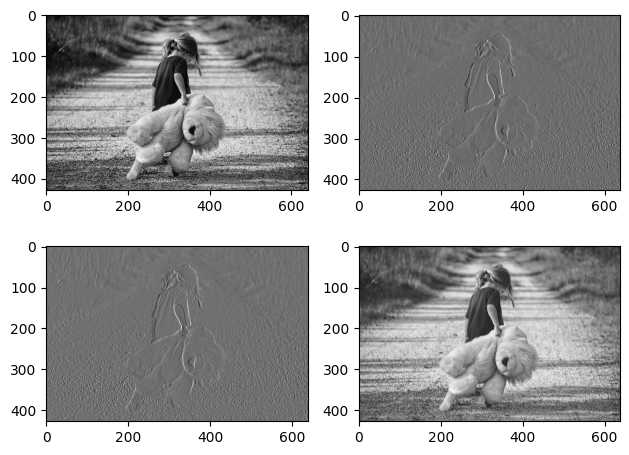

In [38]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Image Data Loading
ori_image = img.imread('/content/drive/MyDrive/KDT/data/Image/girl.jpg')
print(type(ori_image)) # <class 'numpy.ndarray'>
print(ori_image.shape) # (429, 640, 3)

# tensorflow가 제공하는 함수를 이용해서 conv 연산을 수행
# 입력이미지의 형태
# (1, 429, 640, 3) => (이미지 개수, height, width, channel)
input_image = ori_image.reshape((1,) + ori_image.shape)
print(input_image.shape) # (1, 429, 640, 3)
input_image = input_image.astype(np.float32)

# 흑백이미지도 원래 3차원이에요! (channel이 3인)
# 흑백이미지는 1개의 채널을 이용해서 3차원으로 표현이 가능!
# 입력이미지의 channel을 변경
# (1, 429, 640, 1)
input_image_1_channel = input_image[:,:,:,0:1]
print(input_image_1_channel.shape) # (1, 429, 640, 1)

# Filter (Kernel) 준비
# (3, 3, 1, 3) => (height, width, filter channel, filter 개수)
# 이 filter는 기본적으로 랜덤을 기반으로 만들어져요!
# 그리고 지속적으로 갱신되서 점점 더 좋은 필터로 만들어지게 되요!
filter = np.array([[[[-1, -1, 0]], [[0, 0, 2]], [[1, 1, -1]]],
                   [[[-1, -2, 0]], [[0, 0, 2]], [[1, 2, 0]]],
                   [[[-1, -1, 0]], [[0, 0, 2]], [[1, 1, 1]]]])
print(filter.shape) # (3, 3, 1, 3)

# strides : 1
# padding : VALID(패딩 사용 X), SAME(패딩 사용)

# convolution 연산을 수행
image_conv2d = tf.nn.conv2d(input_image_1_channel,
                            filter,
                            strides=[1,1,1,1],
                            padding='VALID')

# 결과가 tensorflow 내부 자료구조인 tensor로 생성되요!
image_conv2d_result = image_conv2d.numpy()
print(image_conv2d_result.shape) # (1, 427, 638, 3) => (이미지 개수, height, width, filter 개수)

ax1.imshow(ori_image)
ax2.imshow(image_conv2d_result[0,:,:,0], cmap='gray')
ax3.imshow(image_conv2d_result[0,:,:,1], cmap='gray')
ax4.imshow(image_conv2d_result[0,:,:,2], cmap='gray')
plt.tight_layout()
plt.show()

(429, 640, 3)
(1, 429, 640, 3)
(1, 427, 638, 1)
(1, 142, 212, 1)


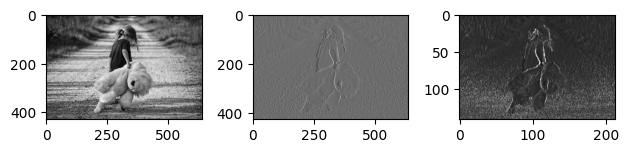

In [40]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# image data loading
ori_image = img.imread('/content/drive/MyDrive/KDT/data/Image/girl.jpg')
# print(type(ori_image))  # <class 'numpy.ndarray'>
print(ori_image.shape)  # (429, 640, 3)

# tensorflow가 제공하는 함수를 이용해서 conv 연산을 수행
# 입력이미지의 형태
# (1, 429, 640, 3) => (이미지 개수, height, width, channel )
input_image = ori_image.reshape((1,) + ori_image.shape)
print(input_image.shape) # (1, 429, 640, 3)
input_image = input_image.astype(np.float32)

# 흑백이미지도 원래는 3차원이예요!(channel이 3인)
# 흑백이미지는 1개의 channel을 이용해서 3차원으로 표현이 가능!
# 입력이미지의 channel을 변경
# (1, 429, 640, 1)
input_image_1_channel = input_image[:,:,:,0:1]
# input_image_1_channel.shape # (1, 429, 640, 1)

# Filter(Kernel) 준비
# (3, 3, 1, 1) => (height, width, filter channel, filter 개수)
# 이 filter는 기본적으로 랜덤을 기반으로 만들어져요!
# 그리고 지속적으로 갱신되서 점점 더 좋은 필터로 만들어지게 되요!
# filter = np.random.rand(3,3,1,1)
filter = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]])
# filter.shape # (3, 3, 1, 1)

# strides : 1
# padding : VALID(패딩 사용 X), SAME(패딩 사용)

# convolution 연산을 수행
image_conv2d = tf.nn.conv2d(input_image_1_channel,
                      filter,
                      strides=[1,1,1,1],
                      padding='VALID')
# 결과가 tensorflow 내부 자료구조인 tensor로 생성되요!
image_conv2d_result = image_conv2d.numpy()
print(image_conv2d_result.shape) # (1, 427, 638, 3) => (이미지 개수, height, width, filter 개수)
# (이미지 개수, height, width, filter 개수)

# Pooling 처리
pool = tf.nn.max_pool(image_conv2d_result,
                      ksize=[1,3,3,1],
                      strides=[1,3,3,1],
                      padding='VALID')
pool_result = pool.numpy()
print(pool_result.shape) # (1, 142, 212, 1) => (이미지 개수, height, width, filter 개수)

ax1.imshow(ori_image)
ax2.imshow(image_conv2d_result[0], cmap='gray')
ax3.imshow(pool_result[0], cmap='gray')
plt.tight_layout()
plt.show()

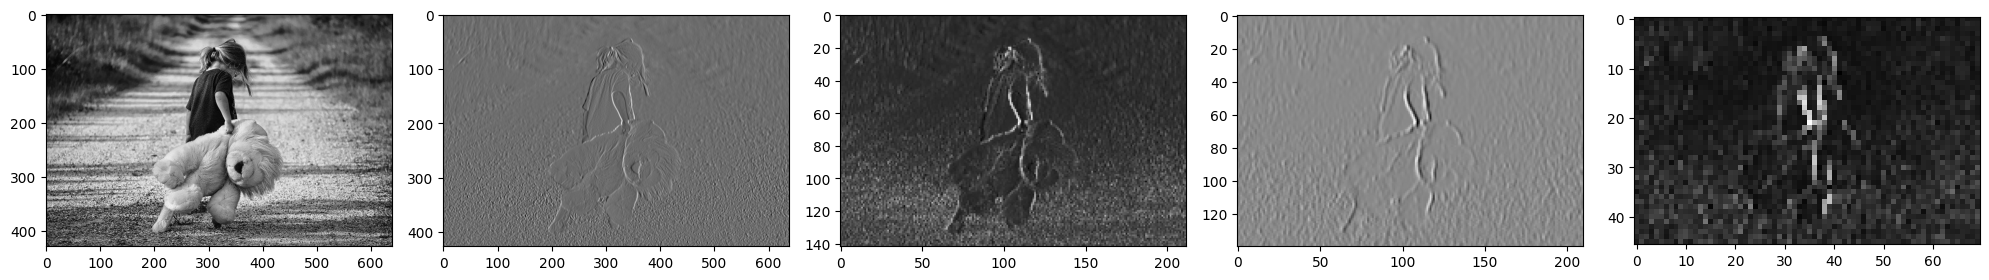

In [48]:
# 원본 -> convolution -> pooling -> convolution -> pooling
# 그 결과를 출력해보세요!
# 원본에서 convolution을 이용해서 특징이 추출된 이미지를 많이 만들어요!
# 이런 이미지들에 대해서 각각 pooling 처리를 진행
# 특징을 조금 더 강조하고 이미지의 사이즈를 줄일 수 있어요!
# 이미지의 사이즈를 줄여야 하는 이유 ->
# 이미지 1장이 결국 1차원으로 표현되어야 해요!
# 10x10 -> 1차원
# 3x3 -> 1차원
# 우리는 여러개의 convolution layer를 사용해요!
# 앞쪽(입력과 가까운 쪽)의 convolution layer의 filter 개수
# 뒤쪽의 convolution layer의 filter 개수 -> 이게 더 많아야 해요!
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

# image data loading
ori_image = img.imread('/content/drive/MyDrive/KDT/data/Image/girl.jpg')
input_image = ori_image.reshape((1,) + ori_image.shape)
input_image = input_image.astype(np.float32)
input_image_1_channel = input_image[:,:,:,0:1]

filter = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]])

image_conv2d_1 = tf.nn.conv2d(input_image_1_channel,
                      filter,
                      strides=[1,1,1,1],
                      padding='VALID')
image_conv2d_result_1 = image_conv2d_1.numpy()

pool_1 = tf.nn.max_pool(image_conv2d_result_1,
                      ksize=[1,3,3,1],
                      strides=[1,3,3,1],
                      padding='VALID')
pool_result_1 = pool_1.numpy()

image_conv2d_2 = tf.nn.conv2d(pool_result_1,
                      filter,
                      strides=[1,1,1,1],
                      padding='VALID')
image_conv2d_result_2 = image_conv2d_2.numpy()

pool_2 = tf.nn.max_pool(image_conv2d_result_2,
                      ksize=[1,3,3,1],
                      strides=[1,3,3,1],
                      padding='VALID')
pool_result_2 = pool_2.numpy()

ax1.imshow(ori_image)
ax2.imshow(image_conv2d_result_1[0], cmap='gray')
ax3.imshow(pool_result_1[0], cmap='gray')
ax4.imshow(image_conv2d_result_2[0], cmap='gray')
ax5.imshow(pool_result_2[0], cmap='gray')
plt.tight_layout()
plt.show()

In [9]:
# MNIST를 CNN으로 구현해 보아요!
# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import classification_report

In [10]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/KDT/kaggle/Digit Recognizer/01. train.csv')
df.shape # (42000, 785)

(42000, 785)

In [11]:
# 결측치 이상치 X
# Feature Enigineering 필요 X
# 독립변수와 종속변수 분리
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values.reshape(-1, 1)

In [12]:
# 학습데이터와 평가용 데이터 분리
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(x_data,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=42)

In [13]:
# 정규화 진행 -> x_data_train을 기준으로 정규화
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

In [14]:
# Model 구현
model = Sequential()

# 첫번째 layer를 통과한 다음에 그 결과 데이터의 shape => (26, 26, 32)
model.add(Conv2D(filters=32,
                 kernel_size=(3,3), # (3, 3, 1) -> 입력의 채널에 맞춤
                 activation='relu',
                 strides=(1,1),
                 input_shape=(28,28,1)))

# 두번째 layer를 통과한 다음에 그 결과 데이터의 shape => (24, 24, 64)
model.add(Conv2D(filters=64,
                 kernel_size=(3,3), # (3, 3, 32) -> 입력의 채널에 맞춤
                 activation='relu',
                 strides=(1,1)))

# 세번째 layer를 통과한 다음에 그 결과 데이터의 shape => (12, 12, 64)
model.add(MaxPooling2D(pool_size=(2,2)))

# 네번째 layer를 통과한 다음에 그 결과 데이터의 shape => (10, 10, 256)
model.add(Conv2D(filters=256,
                 kernel_size=(3,3), # (3, 3, 64) -> 입력의 채널에 맞춤
                 activation='relu',
                 strides=(1,1)))

# 마지막 layer를 통과한 다음에 그 결과 데이터의 shape => (5, 5, 256)
model.add(MaxPooling2D(pool_size=(2,2)))

######## Feature Extraction 끝 ########

model.add(Flatten()) # (None, 5 * 5 * 256) -> (None, 6400)
model.add(Dropout(rate=0.5)) # overfitting의 정도를 줄이기 위해서
model.add(Dense(units=256,
                kernel_regularizer=L2(l2=0.1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(units=10,
                activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,808,778 (6.90 MB)

 Trainable params: 1,808,266 (6.90 MB)

 Non-trainable params: 512 (2.00 KB)

In [15]:
# Model 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es_callback = EarlyStopping(monitor='val_loss',
                            patience=5,
                            restore_best_weights=True,
                            verbose=1)

cp_callback = ModelCheckpoint(filepath='/content/mnist.weights.h5',
                              save_best_only=True,
                              save_weights_only=True,
                              monitor='val_loss',
                              verbose=1)

In [16]:
print(x_data_test_norm.shape) # (12600, 784)
print(x_data_test_norm.reshape(-1, 28, 28, 1).shape) # (12600, 28, 28, 1)
history = model.fit(x_data_train_norm.reshape(-1, 28, 28, 1),
                    t_data_train,
                    epochs=100,
                    validation_split=0.2,
                    batch_size=100,
                    callbacks=[es_callback, cp_callback],
                    verbose=1)

(12600, 784)
(12600, 28, 28, 1)
Epoch 1/100
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6888 - loss: 33.3898
Epoch 1: val_loss improved from inf to 6.50545, saving model to /content/mnist.weights.h5
236/236 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.6895 - loss: 33.3382 - val_accuracy: 0.9702 - val_loss: 6.5055
Epoch 2/100
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9658 - loss: 3.1992
Epoch 2: val_loss improved from 6.50545 to 0.81797, saving model to /content/mnist.weights.h5
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9658 - loss: 3.1940 - val_accuracy: 0.9787 - val_loss: 0.8180
Epoch 3/100
235/236 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9754 - loss: 0.3914
Epoch 3: val_loss improved from 0.81797 to 0.23557, saving model to /content/mnist.weights.h5
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9754 - loss: 0.3908 - val_accuracy: 0.9781 - val_loss: 0.2356
Epoch 4/100
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9759